In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from IPython.display import Image
from sklearn.datasets import load_digits

In [4]:
#dataset
digits = load_digits()

In [5]:
data = digits.images
target = digits.target

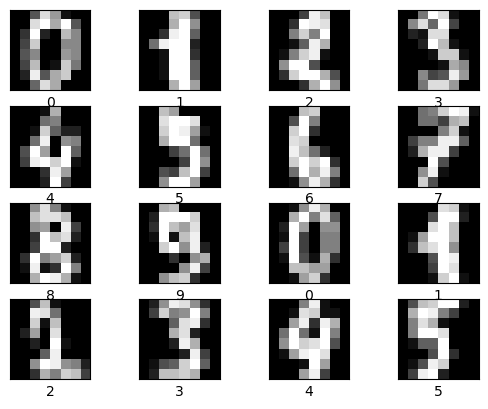

In [6]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i] , cmap = "gray")
    plt.xlabel(target[i])
plt.show()

In [7]:
print(data.shape)
print(target.shape)
data[0]

(1797, 8, 8)
(1797,)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
#Reshaping input
data = data.reshape(1797,64,)
print(data.shape)


(1797, 64)


In [12]:
# standardize using min max scaler technique
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(data)

In [15]:
#splitting into train and test data sets
x_train , x_test , y_train , y_test = train_test_split(X , target , test_size=0.25 , random_state = 45)

In [19]:
print("x_train shape : " , x_train.shape)
print("y_train shape : " , y_train.shape)
print("x_test shape : " , x_test.shape)
print("y_test shape : " , y_test.shape)

x_train shape :  (1347, 64)
y_train shape :  (1347,)
x_test shape :  (450, 64)
y_test shape :  (450,)


### Machine Learning Concept ###

In [22]:
lg = LogisticRegression()
lg.fit(x_train , y_train)
y_pred = lg.predict(x_test)

--------------------------------Accuracy Score--------------------------------
0.9688888888888889
--------------------------------Confusion Matrix--------------------------------
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  1  1  0]
 [ 0  1  0  0  0 36  0  0  0  2]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 45  1  1]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  2  4 46]]
--------------------------------Confusion Matrix HeatMap--------------------------------


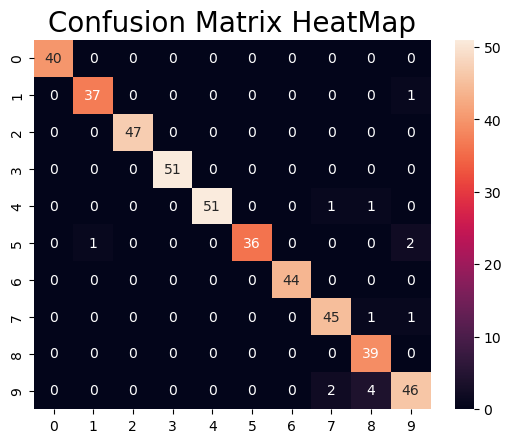

In [28]:
print("--------------------------------Accuracy Score--------------------------------")
print(accuracy_score(y_test , y_pred))
print("--------------------------------Confusion Matrix--------------------------------")
print(confusion_matrix(y_test , y_pred))
print("--------------------------------Confusion Matrix HeatMap--------------------------------")
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True)
plt.title(label="Confusion Matrix HeatMap",fontsize=20)
plt.show()

In [30]:
print("--------------------------------Classification Report--------------------------------")
print(classification_report(y_test , y_pred))

--------------------------------Classification Report--------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        51
           4       1.00      0.96      0.98        53
           5       1.00      0.92      0.96        39
           6       1.00      1.00      1.00        44
           7       0.94      0.96      0.95        47
           8       0.87      1.00      0.93        39
           9       0.92      0.88      0.90        52

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [40]:
print("--------------------------------Classification Report HeatMap--------------------------------")
report = classification_report(y_test , y_pred , output_dict = True)
print(report)
report_df = pd.DataFrame(report)
print(report_df)
report_final = report_df.transpose()
print(report_final)



--------------------------------Classification Report HeatMap--------------------------------
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 40.0}, '1': {'precision': 0.9736842105263158, 'recall': 0.9736842105263158, 'f1-score': 0.9736842105263158, 'support': 38.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 47.0}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 51.0}, '4': {'precision': 1.0, 'recall': 0.9622641509433962, 'f1-score': 0.9807692307692307, 'support': 53.0}, '5': {'precision': 1.0, 'recall': 0.9230769230769231, 'f1-score': 0.96, 'support': 39.0}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 44.0}, '7': {'precision': 0.9375, 'recall': 0.9574468085106383, 'f1-score': 0.9473684210526315, 'support': 47.0}, '8': {'precision': 0.8666666666666667, 'recall': 1.0, 'f1-score': 0.9285714285714286, 'support': 39.0}, '9': {'precision': 0.92, 'recall': 0.8846153846153846, 'f1-score': 0.9019607843137255

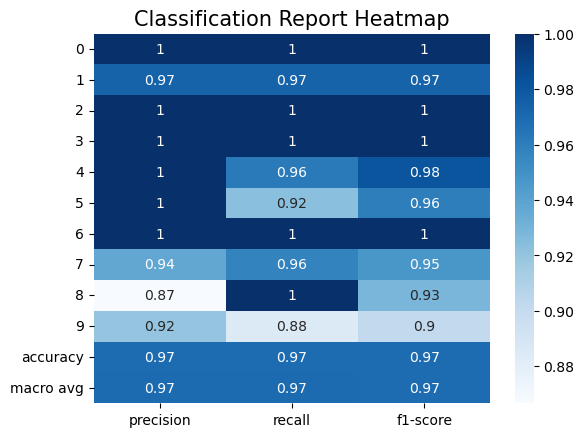

In [52]:
sns.heatmap(report_final.iloc[:-1 , :-1] , annot=True , cmap = "Blues" , cbar=True)
plt.title(label="Classification Report Heatmap",fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({"Actual"})